In [ ]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# ----------- 기본 설정------------

pytrends = TrendReq(hl='ko', tz=540)
timeframe = '2021-07-12 2022-03-17'

In [3]:
# ------------ 함수 정의 ------------

# 키워드 개별 추적 (절대적 변화 추세 확인)
def fetch_individual_trends(keywords, timeframe):
    all_trends = pd.DataFrame()
    for keyword in keywords:
        pytrends.build_payload([keyword], cat=0, timeframe=timeframe, geo='KR')
        df = pytrends.interest_over_time()

        if not df.empty:
            df = df.drop(columns='isPartial', errors='ignore')
            if keyword in df.columns:
                all_trends[keyword] = df[keyword]
            else:
                # 컬럼이 없어도 인덱스 기준으로 0값 추가
                all_trends[keyword] = pd.Series(0, index=df.index)
                print(f"[경고] '{keyword}'에 대한 컬럼이 없어 0으로 채워서 추가합니다.")
        else:
            print(f"[경고] '{keyword}'에 대한 관심도 데이터가 완전히 비어 있습니다. 0으로 채웁니다.")
            # 날짜 인덱스 생성 (혹시라도 전부 비었을 경우에도 날짜 맞춰야 함)
            if all_trends.shape[0] > 0:
                all_trends[keyword] = 0
            else:
                # 최초 df가 비었을 경우: 날짜를 생성해줘야 함
                dates = pd.date_range(start=timeframe.split()[0], end=timeframe.split()[1])
                all_trends = pd.DataFrame(index=dates)
                all_trends[keyword] = 0
    return all_trends

# 키워드 묶음 요청 (상대 비교용)
def fetch_relative_trends(keywords, timeframe):
    pytrends.build_payload(keywords, cat=0, timeframe=timeframe, geo='KR')
    df = pytrends.interest_over_time()
    if not df.empty:
        return df.drop(columns='isPartial')
    else:
        print(f"[경고] 키워드 {keywords}에 대한 관심도 데이터가 존재하지 않거나 유효하지 않습니다.")
        return pd.DataFrame()

# 시각화 함수
def plot_trends(df, title):
    plt.figure(figsize=(12, 6))
    for col in df.columns:
        plt.plot(df.index, df[col], label=col)
    plt.title(title)
    plt.xlabel("날짜")
    plt.ylabel("관심도")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

### 윤석열 후보

In [4]:
keywords = ["NE능률", "서연", "삼부토건", "노루홀딩스", "신원종합개발"]     # 윤석열 후보 테마주

# 키워드 개별 (절대 추이)
individual_df = fetch_individual_trends(keywords, timeframe)
plot_trends(individual_df, "2022 윤석열 후보 테마주 관심도 추이 (개별 추적)")
# individual_df.to_csv("2022_yoonsukyeol_theme_individual.csv", encoding='utf-8-sig')

# 키워드 묶음 (상대 비교)
relative_df = fetch_relative_trends(keywords, timeframe)
plot_trends(relative_df[keywords], "2022 윤석열 후보 테마주 관심도 추이 (상대 비교)")
# relative_df.to_csv("2025_yoonsukyeol_theme_relative.csv", encoding='utf-8-sig')

# 절대 추이의 경우
# 현재의 키워드 검색량이 가장 많았던 시기를 관심도 100으로 설정합니다.
# 해당 시점의 키워드 검색량을 바탕으로 검색 시기 사이에 최대 관심도 대비 얼마나 검색량이 있었는지 계산합니다.
# 따라서, 각 키워드 간의 관심도를 상대적으로 비교하는 것은 불가능합니다.

# 상대 비교의 경우
# 키워드 리스트에서 가장 관심도가 높았던 키워드가 기준이 됩니다.
# 해당 키워드가 가장 관심을 많이 받았던 시점이 100이 됩니다.
# 타 키워드들은 해당 기준 시점에 대한 비율로 관심도를 계산합니다.
# 따라서, 해당 시점의 키워드별 상대적 검색량을 확인할 수 있습니다.

TooManyRequestsError: The request failed: Google returned a response with code 429

### 이재명 후보

[경고] '웹케시'에 대한 관심도 데이터가 완전히 비어 있습니다. 0으로 채웁니다.


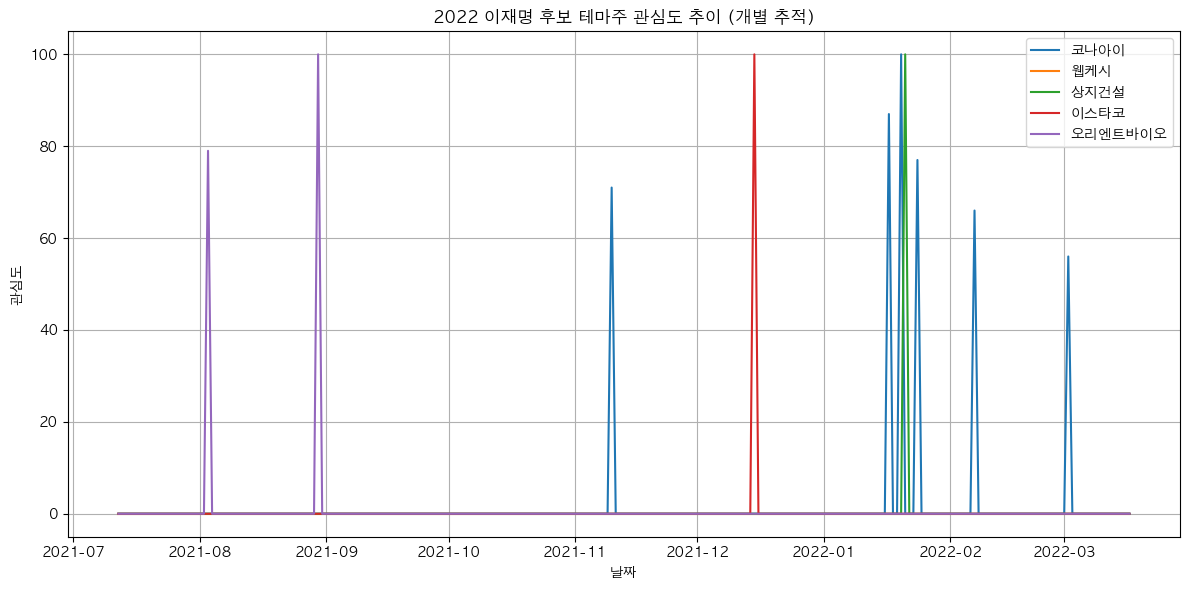

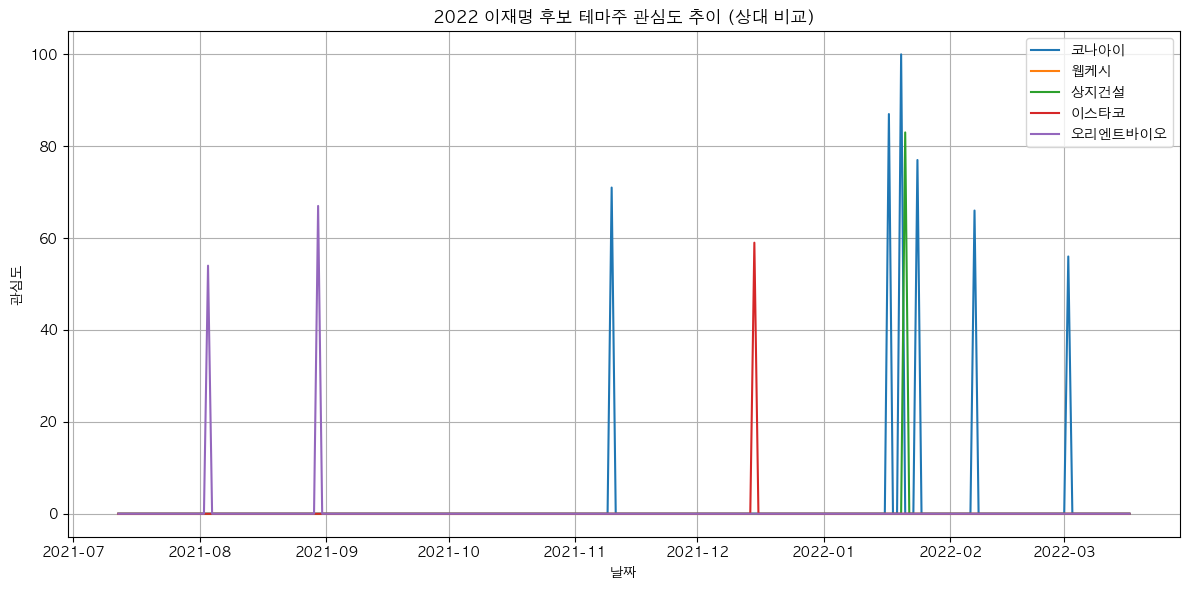

In [ ]:
keywords = ["코나아이", "웹케시", "상지건설", "이스타코", "오리엔트바이오"]     # 이재명 후보 테마주

# 키워드 개별 (절대 추이)
individual_df = fetch_individual_trends(keywords, timeframe)
plot_trends(individual_df, "2022 이재명 후보 테마주 관심도 추이 (개별 추적)")
# individual_df.to_csv("2022_leejaemyung_theme_individual.csv", encoding='utf-8-sig')

# 키워드 묶음 (상대 비교)
relative_df = fetch_relative_trends(keywords, timeframe)
plot_trends(relative_df[keywords], "2022 이재명 후보 테마주 관심도 추이 (상대 비교)")
# relative_df.to_csv("2022_leejaemyung_theme_relative.csv", encoding='utf-8-sig')

# 절대 추이의 경우
# 현재의 키워드 검색량이 가장 많았던 시기를 관심도 100으로 설정합니다.
# 해당 시점의 키워드 검색량을 바탕으로 검색 시기 사이에 최대 관심도 대비 얼마나 검색량이 있었는지 계산합니다.
# 따라서, 각 키워드 간의 관심도를 상대적으로 비교하는 것은 불가능합니다.

# 상대 비교의 경우
# 키워드 리스트에서 가장 관심도가 높았던 키워드가 기준이 됩니다.
# 해당 키워드가 가장 관심을 많이 받았던 시점이 100이 됩니다.
# 타 키워드들은 해당 기준 시점에 대한 비율로 관심도를 계산합니다.
# 따라서, 해당 시점의 키워드별 상대적 검색량을 확인할 수 있습니다.